## Feature Matching
* Feature matching extracts defining key features from an input image (using ideas from corner, edge, contour detection)
* Then using a distance calculation, finds all the matches in a secondary image.
* This means we are no longer required to have an exact copy of the target image.

**We will use three methods here:**
    
    1. Brute-Force Matching with OCB descriptors.
    2. Brute-Force matching with SIFT descriptors and ratio test
    3. FLANN based Matcher

In [1]:
# Import all the required modules 
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)

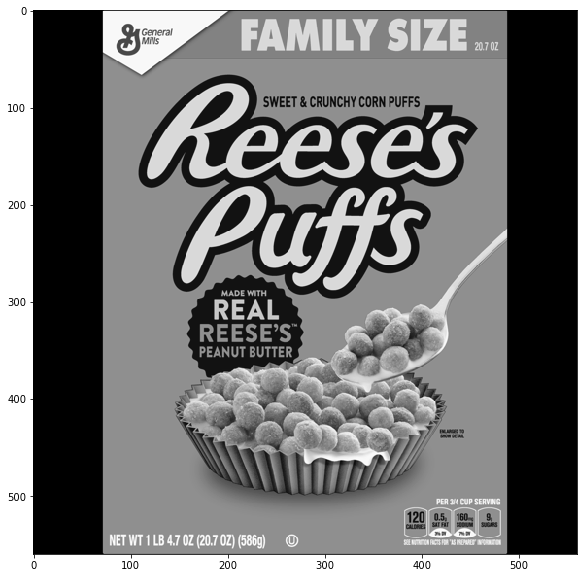

In [9]:
reeses=cv2.imread("reeses_puffs.png",0)
display(reeses)

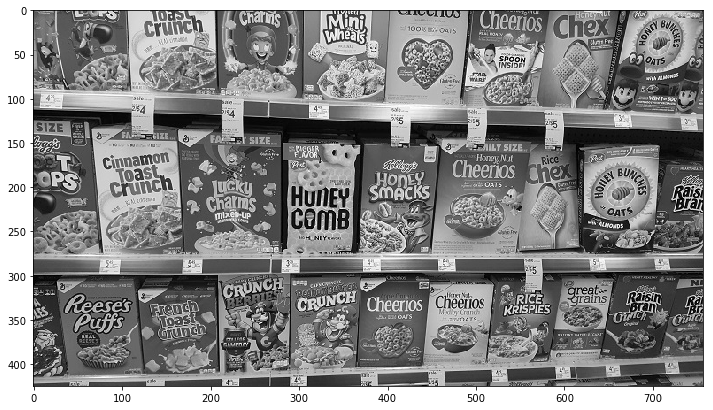

In [11]:
cereals=cv2.imread("many_cereals.jpg",0)
display(cereals)

### Brute Force detection with ORB detector

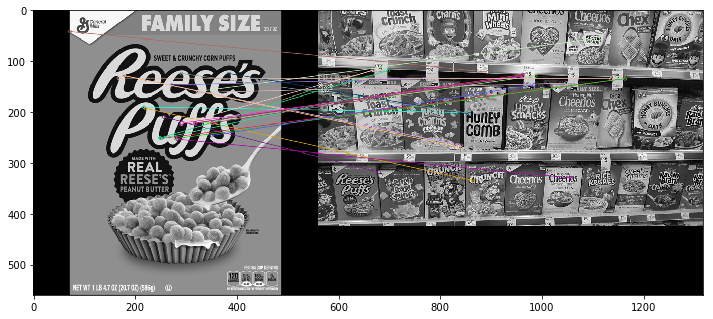

In [14]:
# Create a orb detector
orb=cv2.ORB_create()

# Now create keypoints and descriptors 
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

# create a BFMatcher
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

# match the descriptors
matches=bf.match(des1,des2)

# Sort them in order of their distance
matches=sorted(matches,key=lambda x: x.distance)

# If the distance of the descriptors is small that means that object is a better match

# Draw matches
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

display(reeses_matches)

In [15]:
# This Method is not useful as it doesn't find reese's in cereals image, let's try SIFT Method for better results

## SIFT Descriptors

In [22]:
# Create SIFT object
sift=cv2.xfeatures2d.SIFT_create()

# create key points and descriptors
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

# Brute Force Matcher
bf=cv2.BFMatcher()  #matcher with default params

# MAtch descriptors
matches=bf.knnMatch(des1,des2,k=2) # k=2 means best 2 match object

# ratio test
good=[]
#less distance= better match
for match1,match2 in matches:
    # if match1 distance is less than 75% distance of match 2, then descriptor is a good match let's keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
    
# draw the matches 
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

    
    

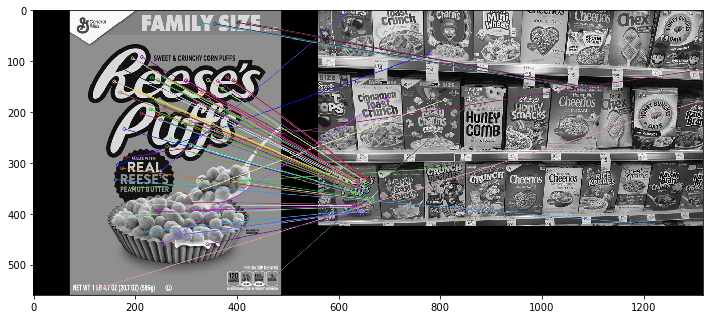

In [23]:
display(sift_matches)

In [24]:
# As you can observe we have find our reese's match in the cereals image